# KPMG VIRTUAL INTERNSHIP PROJECT

## Task 1 - Data Quality Assessment
Assessment of data quality and completeness in preparation for analysis

### Introduction :

**Sprocket Central Pty Ltd** , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team.

Smith discusses KPMG’s expertise in this space. In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy.

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

**The client provided KPMG with 3 datasets:**

- Customer Demographic 
- Customer Addresses
- Transaction data in the past three months

## Importing Required Libraries & Reading the Dataset

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")

In [3]:
t = pd.read_excel(df, 'Transactions', header=1)
ncl = pd.read_excel(df, 'NewCustomerList', header=1)
cd = pd.read_excel(df, 'CustomerDemographic', header=1)
ca = pd.read_excel(df, 'CustomerAddress', header=1)

## Exploring Datasets

### Transactions Sheet

In [4]:
t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
t.shape

(20000, 13)

In [6]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

One thing to notice is that product_first_sold_date is float instead of date <br>
so, we will fix this quickly.

In [7]:
t['product_first_sold_date'] = pd.to_datetime(t['product_first_sold_date'], unit='s')

In [8]:
t.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [9]:
t.duplicated().sum()

0

In [10]:
t.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Those 7 columns which have missing values need to be handled.<br>
Also, there are 6 cols which have the exact number of missing values so, it seems to be a pattern.

In [11]:
#First column to handle, online_order
t['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [12]:
t[t['online_order'].isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 10:30:23
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,1970-01-01 10:41:22
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:30:38
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,1970-01-01 11:42:25
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 09:50:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,1970-01-01 11:29:05
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 11:24:24
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,1970-01-01 10:33:22


We can't identify any pattern and there are no other columns to tell is if it was an online_order or not. <br>
And as almost the 2 categories have equal values, so it won't be wise to impute it with the mode. <br>
Instead of dropping them, we don't want to lose that much data. <br>
Best solution is to fill the nans with new value (2 for now) till the next meeting with our client to see if they have logs to know the real values. <br>


In [13]:
t['online_order'].fillna(2, inplace=True)

In [14]:
t['online_order'].value_counts()

1.0    9829
0.0    9811
2.0     360
Name: online_order, dtype: int64

In [15]:
#let's see the next col with missing values
t.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

<AxesSubplot:>

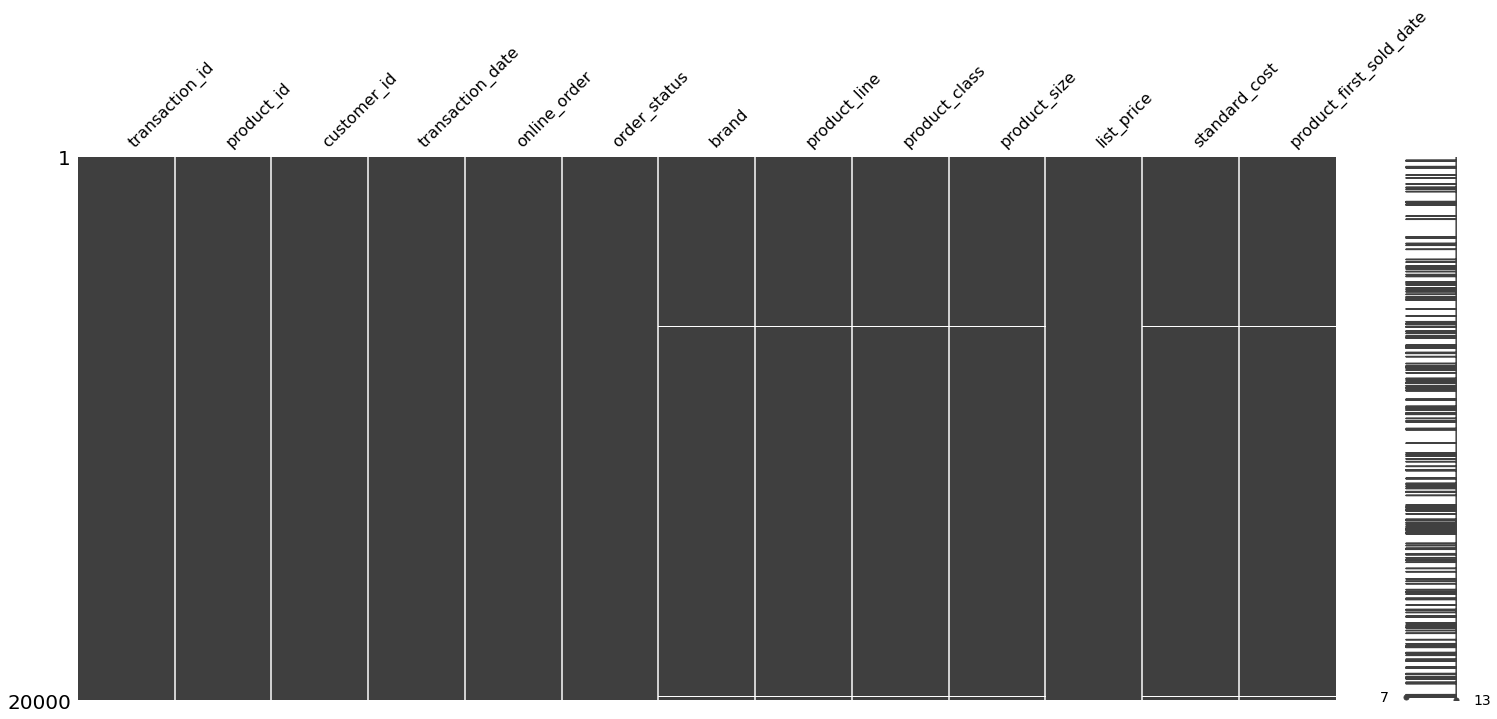

In [16]:
#just to see if there's a pattern
import missingno as msno

msno.matrix(t)

Yes, as expected it is a straight line, so the 197 values are missing in the 6 columns are related. <br>
Maybe, there was a problem in the period these orders were purchased.<br>
So, we will drop them.

In [17]:
t.dropna(axis=0, inplace=True)

In [18]:
t.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

After handling the missing values, let's check if there are outliers.

In [19]:
t.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [20]:
t['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [21]:
t['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [22]:
t['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [23]:
t['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [24]:
t['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

Seems so good so far.

In [25]:
t['product_first_sold_date'].head(30)

0    1970-01-01 11:27:25
1    1970-01-01 11:35:01
2    1970-01-01 10:06:01
3    1970-01-01 10:02:25
4    1970-01-01 11:43:46
5    1970-01-01 10:50:31
6    1970-01-01 09:29:25
7    1970-01-01 11:05:15
8    1970-01-01 09:17:35
9    1970-01-01 10:36:56
10   1970-01-01 11:19:44
11   1970-01-01 11:42:52
12   1970-01-01 09:35:27
13   1970-01-01 09:36:26
14   1970-01-01 10:36:33
15   1970-01-01 10:31:13
16   1970-01-01 10:36:46
17   1970-01-01 09:24:48
18   1970-01-01 11:05:15
19   1970-01-01 10:22:17
20   1970-01-01 10:05:34
21   1970-01-01 10:06:01
22   1970-01-01 11:42:25
23   1970-01-01 11:46:44
24   1970-01-01 09:27:59
25   1970-01-01 11:42:25
26   1970-01-01 11:24:07
27   1970-01-01 11:49:20
28   1970-01-01 11:51:50
29   1970-01-01 11:38:42
Name: product_first_sold_date, dtype: datetime64[ns]

hmm, that doesn't sound right. <br>
Our dataset has 20000 rows, meaning 20,000 purchases, seems a little sus for all of them to be bought at the same day. <br>
But, we need to make sure in the follow up meeting from our client.

### NewCustomerList Sheet

In [26]:
ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [27]:
ncl.shape

(1000, 23)

In [28]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [29]:
#Drop unnamed columns 
ncl.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],
        axis=1, inplace = True)

In [30]:
ncl.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [31]:
ncl.duplicated().sum()

0

In [32]:
ncl.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

last_name may be optional and we can't fill it eitherways so we leave it be. <br>
Same with DOB, so we drop it.


In [33]:
#first col
ncl['last_name'].fillna('', inplace=True)

In [34]:
#second col
ncl.dropna(subset = ['DOB'], inplace=True)

job_title and job_industry_category have missing values but we need to have a follow up meeting with the client to know if what they want to do with them, whether to impute them or drop them.

In [35]:
ncl['job_title'].value_counts()

Environmental Tech          14
Software Consultant         14
Associate Professor         14
Chief Design Engineer       13
Cost Accountant             12
                            ..
Web Developer II             1
Statistician III             1
Systems Administrator IV     1
Accounting Assistant IV      1
Web Developer I              1
Name: job_title, Length: 184, dtype: int64

In [36]:
ncl['job_industry_category'].value_counts()

Financial Services    202
Manufacturing         199
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [37]:
ncl.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [38]:
ncl['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

In [39]:
ncl['past_3_years_bike_related_purchases'].mean()

49.824008138351985

In [40]:
ncl['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

In [41]:
ncl['country'].value_counts()

Australia    983
Name: country, dtype: int64

In [42]:
#As all the customers are from Australia, we can drop the column for performance optimaztion as we won't lose info
ncl.drop(['country'], axis=1, inplace = True)

In [43]:
ncl['state'].value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

In [44]:
ncl['tenure'].value_counts()

9     79
13    73
11    66
10    63
12    60
7     59
17    59
5     57
15    57
8     55
14    52
16    49
6     45
18    36
4     35
19    34
3     25
21    24
20    22
2     13
22    12
1      8
Name: tenure, dtype: int64

Grouping tenure years into 5 groups for easier analysis.

In [45]:
bins= [0, 6, 11, 16, 21, 30]
labels = ['1-5','6-10','11-15','16-20','20+']
ncl['TenureGroups'] = pd.cut(ncl['tenure'], bins=bins, labels=labels, right=False)

#Drop Tenure column
ncl.drop(['tenure'], axis=1, inplace = True)

ncl['TenureGroups'].value_counts()

11-15    308
6-10     301
16-20    200
1-5      138
20+       36
Name: TenureGroups, dtype: int64

In [46]:
ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,property_valuation,Rank,Value,TenureGroups
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,45 Shopko Center,4500,QLD,6,1,1.718750,11-15
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,14 Mccormick Park,2113,NSW,11,1,1.718750,16-20
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,5 Colorado Crossing,3505,VIC,5,1,1.718750,6-10
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,207 Annamark Plaza,4814,QLD,1,4,1.703125,1-5
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,115 Montana Place,2093,NSW,9,4,1.703125,16-20


### CustomerDemographic Sheet

In [47]:
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [48]:
cd.shape

(4000, 13)

In [49]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [50]:
cd.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [51]:
cd.duplicated().sum()

0

In [52]:
cd.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [53]:
#Same as the last sheet

#last_name handling
cd['last_name'].fillna('', inplace=True)

#dropping empty DOB
cd.dropna(subset = ['DOB'], inplace=True)

In [54]:
#Divide Tenure into groups
bins= [0, 6, 11, 16, 21, 30]
labels = ['1-5','6-10','11-15','16-20','20+']
cd['TenureGroups'] = pd.cut(cd['tenure'], bins=bins, labels=labels, right=False)

cd.drop(['tenure'], axis=1, inplace = True)

In [55]:
#Filling the missing tenure values with the highest group
cd['TenureGroups'].fillna(cd['TenureGroups'].mode(), inplace=True)
cd['TenureGroups'].value_counts()

6-10     1056
11-15     993
1-5       895
16-20     860
20+       109
Name: TenureGroups, dtype: int64

In [56]:
cd['default'].unique()

array(['"\'', "<script>alert('hi')</script>",
       datetime.datetime(2018, 2, 1, 0, 0),
       '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }',
       'NIL', 'ðµ ð ð ð', 'â°â´âµâââ', '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)', '0/0',
       'ð©ð½', 'ÅâÂ´Â®â\xa0Â¥Â¨ËÃ¸Ïââ', 'nil', -100, 'â°â´âµ', 'ð', 1e+96,
       'ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾', 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·',
       'ÅâÂ´â°ËÃÂ¨ËÃâââ', 'ï¼ï¼ï¼',
       '../../../../../../../../../../../etc/hosts',
       '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ', '<>?:"{}|_+',
       '\'\'\'\'"', ",./;'[]\\-=",
       '() { 0; }; touch /tmp/blns.shellshock1.fail;',
       'ì¬íê³¼íì ì´íì°êµ¬ì', 'testâ\xa0testâ«',
       '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð',
       nan, '!@#$%^&*()', "'",
       'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«ÍiÌÌ¹ÍÌ³Ì³Ì®ÍÌ«nÍdÌ´ÌªÌÌ ÍÌ°ÍÌ©ÍÍÍÌ²TÍ¢ÍÌ¼ÍÌªhÍÍÌ®Ì»eÌ¬ÌÍÌ Ì¤Ì¹ÌWÍÍÍÌÌÍÍaÍÍÍÌ¹Ì¼',
       '../../../

In [57]:
#default is a gibberish column so we drop it
cd.drop(['default'], axis=1, inplace = True)

In [58]:
cd['gender'].value_counts()

Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

In [59]:
#Handling Typos in gender col
cd['gender'] = cd['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
cd['gender'].value_counts()

Female         2039
Male           1873
Unspecified       1
Name: gender, dtype: int64

In [60]:
#clean dataset
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,TenureGroups
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11-15
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16-20
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,11-15
3,4,Talbot,,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,6-10
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,6-10


### CustomerAddress Sheet

In [61]:
ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [62]:
ca['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [63]:
#Again with the country, as they all from Australia so this column provide no information
ca.drop(['country'], axis=1, inplace=True)

In [64]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 125.0+ KB


In [65]:
ca.duplicated().sum()

0

In [66]:
ca['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

state has some duplicated values<br>
NSW is the same as New South Wales <br>
and VIC is Victoria

In [67]:
#Making state col consistent
ca['state'] = ca['state'].replace('Victoria','VIC').replace('New South Wales','NSW')
ca['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [68]:
ca.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
property_valuation    0
dtype: int64

Very good, we've finished cleaning all the datasets

In [70]:
with pd.ExcelWriter('Clean_Data.xlsx') as writer:
    t.to_excel(writer, sheet_name='Transactions', index=False)
    ncl.to_excel(writer, sheet_name='NewCustomerList', index=False)
    cd.to_excel(writer, sheet_name='CustomerDemographic', index=False)
    ca.to_excel(writer, sheet_name='CustomerAddress', index=False)

**The given data is analysed and investigated in all aspects to inspect the Quality of data with respect to all qualities mentioned in the Data Quality Framework Table:**

-    Accuracy

-    Completeness

-    Uniqueness

-    Validity

-    Consistency

-    Relevancy

-    Timeliness
